[View in Colaboratory](https://colab.research.google.com/github/madeleinelee/learning/blob/madeleinelee-patch-1/Copy_of_ex07_earlystopping.ipynb)

## 確認套件已經安裝 & Get data

In [0]:
from __future__ import print_function
!pip install -q keras
import keras
from google.colab import files
import numpy as np
from past.builtins import execfile
import numpy as np
import os

from keras.utils import np_utils
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

Using TensorFlow backend.


## 請將本機端的資料 "pkgo_city66_cass5_v1.csv" 上傳到 colab 環境

In [0]:
if not os.path.exists("pkgo_city66_class5_v1.csv"):
  uploaded = files.upload()

def readInput(file):
  ''' Read input files '''
  my_data = np.genfromtxt(file, delimiter=',',skip_header=1)

  ''' The first column to the 199th column is used as input features '''
  X_train = my_data[:,0:200]
  X_train = X_train.astype('float32')

  ''' The 200-th column is the answer '''
  y_train = my_data[:,200]
  y_train = y_train.astype('int')

  ''' Convert to one-hot encoding '''
  Y_train = np_utils.to_categorical(y_train,5)

  ''' Shuffle training data '''
  X_train,Y_train = shuffle(X_train,Y_train,random_state=100)
  return X_train, Y_train

X_train, Y_train = readInput(file="pkgo_city66_class5_v1.csv")

## 開始建立第一個模型 
### (資料已經先替各位做過簡單的預處理囉)

In [0]:
''' Import keras to build a DL model '''
from keras.models import Model
from keras.layers import Dense, Activation, Input
from keras.optimizers import SGD, Adam, RMSprop, Adagrad
from keras.regularizers import l1, l2, l1_l2
import keras.backend as K


Train on 1652 samples, validate on 184 samples
Epoch 1/50
1652/1652 [==============================] - 0s 266us/step - loss: 1.6687 - acc: 0.4879 - val_loss: 1.2071 - val_acc: 0.5652
Epoch 2/50
1652/1652 [==============================] - 0s 151us/step - loss: 1.1966 - acc: 0.5636 - val_loss: 1.0183 - val_acc: 0.6630
Epoch 3/50
1652/1652 [==============================] - 0s 156us/step - loss: 1.1067 - acc: 0.5993 - val_loss: 0.9983 - val_acc: 0.5978
Epoch 4/50
1652/1652 [==============================] - 0s 155us/step - loss: 1.0264 - acc: 0.6217 - val_loss: 0.9435 - val_acc: 0.6630
Epoch 5/50
1652/1652 [==============================] - 0s 156us/step - loss: 1.0152 - acc: 0.6465 - val_loss: 0.8915 - val_acc: 0.6739
Epoch 6/50
1652/1652 [==============================] - 0s 151us/step - loss: 0.9629 - acc: 0.6616 - val_loss: 0.8456 - val_acc: 0.6957
Epoch 7/50
1652/1652 [==============================] - 0s 150us/step - loss: 0.9295 - acc: 0.6695 - val_loss: 0.9260 - val_acc: 0.6630
E

1652/1652 [==============================] - 0s 156us/step - loss: 0.7695 - acc: 0.7264 - val_loss: 0.7883 - val_acc: 0.7174
Epoch 16/50
1652/1652 [==============================] - 0s 151us/step - loss: 0.7444 - acc: 0.7494 - val_loss: 0.7916 - val_acc: 0.7446
Epoch 17/50
1652/1652 [==============================] - 0s 157us/step - loss: 0.7209 - acc: 0.7542 - val_loss: 0.8621 - val_acc: 0.6739
Epoch 18/50
1652/1652 [==============================] - 0s 153us/step - loss: 0.7148 - acc: 0.7433 - val_loss: 0.7803 - val_acc: 0.7337
Epoch 19/50
1652/1652 [==============================] - 0s 156us/step - loss: 0.7053 - acc: 0.7500 - val_loss: 0.7739 - val_acc: 0.7174
Epoch 00019: early stopping


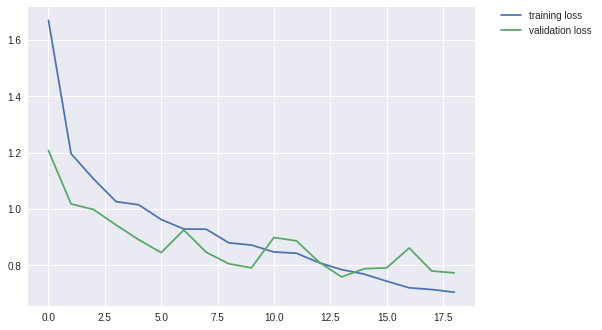

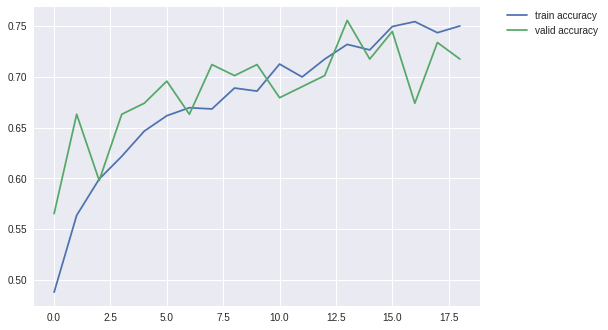

In [0]:
#@title With batchnorm { vertical-output: true, display-mode: "both" }
n_patience = 5 #@param {type:"raw"}
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor = 'val_loss', 
                               patience = n_patience, 
                               verbose = 1)

K.clear_session()

train_loss_list, train_acc_list = [], []
valid_loss_list, valid_acc_list = [], []

x_input = Input(shape = [X_train.shape[1]])

x = Dense(128)(x_input)
x = Activation('relu')(x)

x = Dense(256)(x)
x = Activation('relu')(x)

x = Dense(5)(x)
out = Activation('softmax')(x)

model = Model(inputs=[x_input], outputs=[out])

optim = Adam(lr = 0.001)

model.compile(loss='categorical_crossentropy',
        optimizer=optim,
        metrics=['accuracy'])
#model.summary()

batch_size = 16
epochs = 50

history = model.fit(X_train, Y_train, 
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              shuffle=True,
              validation_split=0.1,
              callbacks=[early_stopping])

loss	= history.history.get('loss')
acc 	= history.history.get('acc')

val_loss = history.history.get('val_loss')
val_acc = history.history.get('val_acc')


# loss
plt.plot(np.arange(len(loss)), loss, label = 'training loss')
plt.plot(np.arange(len(val_loss)), val_loss, label = 'validation loss')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# acc
plt.plot(np.arange(len(acc)), acc, label = 'train accuracy')
plt.plot(np.arange(len(val_acc)), val_acc, label = 'valid accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

